In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Load Two Data Sets and print them using df.head() separately.
df_1 = pd.read_csv('DF_1_FAOSTAT_data_en_11-19-2025.csv')
df_2 = pd.read_csv('DF_2_Crop_recommendation.csv')

print("--- Yield Dataset (DF_1) ---")
print(df_1.head())
print("\n--- Crop Recommendation Dataset (DF_2) ---")
print(df_2.head())

--- Yield Dataset (DF_1) ---
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  

In [2]:
# Task 2: Filter Yield Dataset for Area = India only, print it using df.head() and df.shape().
df_1_india = df_1[df_1['Area'] == 'India'].copy()

print("Filtered Dataset Head:")
print(df_1_india.head())
print("\nFiltered Dataset Shape:", df_1_india.shape)

Filtered Dataset Head:
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha 

In [3]:
# Task 3: Perform Explosion on Yield Dataset
print("Before Explosion Head:")
print(df_1_india.head())
print("Before Explosion Shape:", df_1_india.shape)

# Keep official names with commas intact
protected_items = {
    'Apples', 'Bananas', 'Coconuts, in shell', 'Coffee, green', 'Grapes',
    'Jute, raw or retted', 'Lentils, dry', 'Maize (corn)',
    'Mangoes, guavas and mangosteens', 'Oranges', 'Papayas', 'Rice',
    'Seed cotton, unginned', 'Pigeon peas, dry', 'Chick peas, dry',
    'Cantaloupes and other melons', 'Beans, dry', 'Watermelons',
}

def split_items(item):
    text = str(item).strip()
    if text in protected_items:
        return [text]
    parts = [p.strip() for p in text.split(',') if p.strip()]
    return parts or [text]

# Split, explode, clean
df_1_india['Item_List'] = df_1_india['Item'].apply(split_items)
df_1_exploded = df_1_india.explode('Item_List').copy()
df_1_exploded['Item'] = df_1_exploded['Item_List'].str.strip()

print("\nAfter Explosion Head:")
print(df_1_exploded.head())
print("After Explosion Shape:", df_1_exploded.shape)

Before Explosion Head:
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha 

In [4]:
# Task 4: Merge two datasets (Target 18 Common Crops)

# 1. Map the 18 crops between FAOSTAT and Crop Rec
target_map = {
    'Apples': 'apple',
    'Bananas': 'banana',
    'Coconuts, in shell': 'coconut',
    'Coffee, green': 'coffee',
    'Grapes': 'grapes',
    'Jute, raw or retted': 'jute',
    'Lentils, dry': 'lentil',
    'Maize (corn)': 'maize',
    'Mangoes, guavas and mangosteens': 'mango',
    'Oranges': 'orange',
    'Papayas': 'papaya',
    'Rice': 'rice',
    'Seed cotton, unginned': 'cotton',
    'Pigeon peas, dry': 'pigeonpeas',
    'Chick peas, dry': 'chickpea',
    'Cantaloupes and other melons': 'muskmelon',
    'Beans, dry': 'kidneybeans',
    'Watermelons': 'watermelon'
}

print("\n--- Label diagnostics (df_2) ---")
df_2['label_clean'] = df_2['label'].str.strip().str.lower()
print(df_2['label_clean'].value_counts().rename_axis('label').to_frame('count').sort_index())

# Map FAOSTAT items to target labels
map_lower = {k.lower(): v for k, v in target_map.items()}
df_1_exploded['merge_key'] = df_1_exploded['Item'].str.strip().str.lower().map(map_lower)

# Normalize DF_2 labels with common variants
synonyms = {
    'apples': 'apple', 'grape': 'grapes', 'mangoe': 'mango',
    'seed cotton': 'cotton', 'pigeon pea': 'pigeonpeas', 'pigeonpeas': 'pigeonpeas',
    'chick pea': 'chickpea', 'cantaloupes and other melon': 'muskmelon', 'melon': 'muskmelon',
    'muskmelon': 'muskmelon', 'beans': 'kidneybeans', 'bean': 'kidneybeans',
    'watermelons': 'watermelon', 'coconut': 'coconut', 'coconuts': 'coconut',
    'coocnut': 'coconut', 'cantaloupes': 'muskmelon', 'cantaloupe': 'muskmelon', 'jite': 'jute'
}
df_2['merge_key'] = df_2['label'].str.strip().str.lower().replace(synonyms)

# Inner join on normalized keys
merged_df = pd.merge(df_1_exploded.dropna(subset=['merge_key']), df_2, on='merge_key', how='inner')

print(f"Merged Dataset Shape: {merged_df.shape}")
print(f"Unique Crops Found: {len(merged_df['label'].unique())}")
print("List of Crops:", sorted(merged_df['label'].unique()))


--- Label diagnostics (df_2) ---
             count
label             
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
Merged Dataset Shape: (129600, 26)
Unique Crops Found: 18
List of Crops: ['apple', 'banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'rice', 'watermelon']


In [5]:
# Task 5: Keep only specific columns and drop others
cols_to_keep = ['Element', 'Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

# Select only these columns (Using 'rainfall' from df_2 which is lowercase)
# Ensure we check if columns exist to avoid errors
available_cols = [c for c in cols_to_keep if c in merged_df.columns]
final_df = merged_df[available_cols].copy()

print("Final Dataset Shape:", final_df.shape)
print("Head:\n", final_df.head())
print("Tail:\n", final_df.tail())

Final Dataset Shape: (129600, 10)
Head:
           Element     Value   N    P    K  temperature   humidity        ph  \
0  Area harvested  230000.0  24  128  196    22.750888  90.694892  5.521467   
1  Area harvested  230000.0   7  144  197    23.849401  94.348150  6.133221   
2  Area harvested  230000.0  14  128  205    22.608010  94.589006  6.226290   
3  Area harvested  230000.0   8  120  201    21.186674  91.134357  6.321152   
4  Area harvested  230000.0  20  129  201    23.410447  91.699133  5.587906   

     rainfall  label  
0  110.431786  apple  
1  114.051249  apple  
2  116.039659  apple  
3  122.233323  apple  
4  116.077793  apple  
Tail:
            Element      Value    N   P   K  temperature   humidity        ph  \
129595  Production  3626000.0   97  12  47    25.287846  89.636679  6.765095   
129596  Production  3626000.0  110   7  45    26.638386  84.695469  6.189214   
129597  Production  3626000.0   96  18  50    25.331045  84.305338  6.904242   
129598  Production 

In [6]:
# Task 6: Keep only rows where Element is 'Production'
print("Unique Elements BEFORE filtering:", final_df['Element'].unique())

# Filter the dataset
final_df = final_df[final_df['Element'] == 'Production']

print("Unique Elements AFTER filtering:", final_df['Element'].unique())

Unique Elements BEFORE filtering: ['Area harvested' 'Yield' 'Production']
Unique Elements AFTER filtering: ['Production']


In [7]:
# Task 7: Remove / Drop Column 'Element'
final_df.drop(columns=['Element'], inplace=True)

print("Columns after dropping 'Element':", final_df.columns.tolist())

Columns after dropping 'Element': ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


--- Step 0: Crop counts (before cleaning) ---
             count
crop              
apple         2400
banana        2400
chickpea      2400
coconut       2400
coffee        2400
cotton        2400
grapes        2400
jute          2400
kidneybeans   2400
lentil        2400
maize         2400
mango         2400
muskmelon     2400
orange        2400
papaya        2400
pigeonpeas    2400
rice          2400
watermelon    2400

--- Step 1: Nulls ---
Nulls:
 Value          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
Shape AFTER dropping nulls: (43200, 9)

--- Step 2: Duplicates ---
Duplicates: 600
Shape AFTER dropping duplicates: (42600, 9)

--- Step 3: Removing Outliers ---


/tmp/ipykernel_8733/8694492.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df_clean = final_df.groupby('label', group_keys=False).apply(remove_outliers_per_group)


Shape AFTER removing outliers: (41900, 9)
Crops Remaining: 18
             count
crop              
apple         2400
banana        2400
chickpea      2400
coconut       2300
coffee        2300
cotton        2400
grapes        2400
jute          2400
kidneybeans   2400
lentil        2100
maize         2300
mango         2400
muskmelon     2300
orange        1900
papaya        2400
pigeonpeas    2300
rice          2400
watermelon    2400


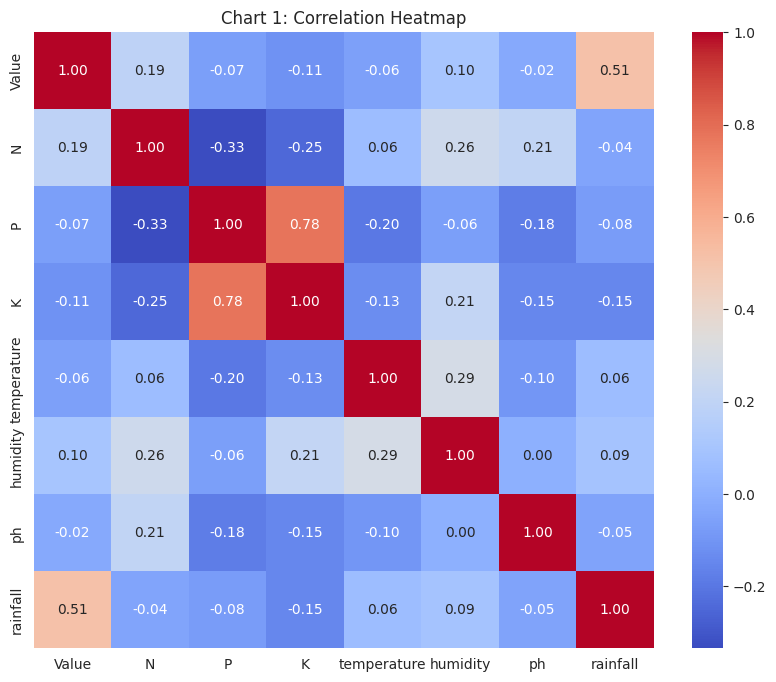

/tmp/ipykernel_8733/8694492.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top4_labels, y=total_by_crop.loc[top4_labels], palette="viridis")


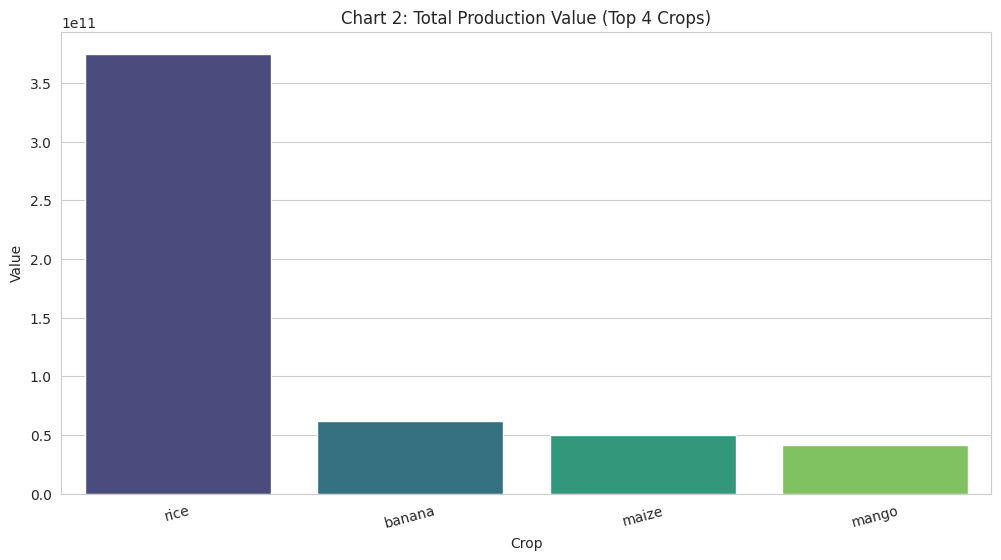

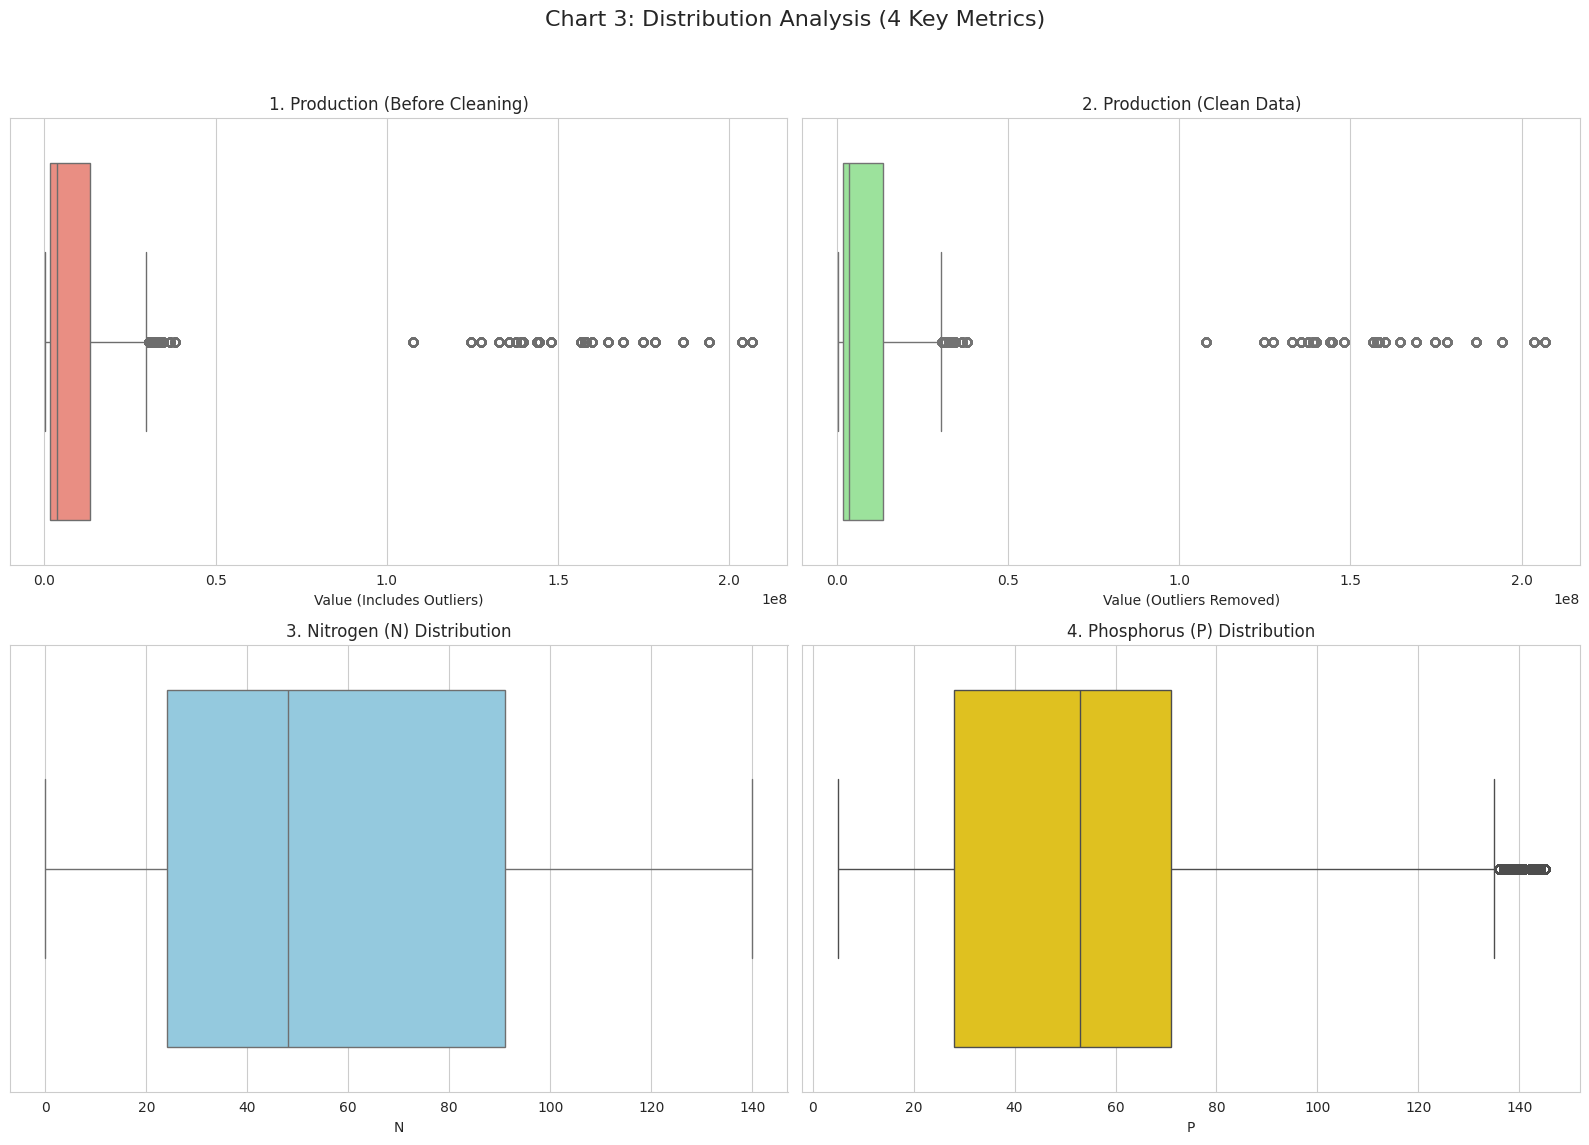

In [8]:
# Task 8: Complete EDA (Visualizing the 12 Crops)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- PART 1: CLEANING ---

print("--- Step 0: Crop counts (before cleaning) ---")
print(final_df['label'].value_counts().rename_axis('crop').to_frame('count').sort_index())

print("\n--- Step 1: Nulls ---")
print("Nulls:\n", final_df.isnull().sum())
final_df.dropna(inplace=True)
print("Shape AFTER dropping nulls:", final_df.shape)

print("\n--- Step 2: Duplicates ---")
print("Duplicates:", final_df.duplicated().sum())
final_df.drop_duplicates(inplace=True)
print("Shape AFTER dropping duplicates:", final_df.shape)

print("\n--- Step 3: Removing Outliers ---")
numeric_cols = ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

def remove_outliers_per_group(group):
    for col in numeric_cols:
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        group = group[(group[col] >= lower) & (group[col] <= upper)]
    return group

final_df_clean = final_df.groupby('label', group_keys=False).apply(remove_outliers_per_group)

print("Shape AFTER removing outliers:", final_df_clean.shape)
print("Crops Remaining:", len(final_df_clean['label'].unique()))
print(final_df_clean['label'].value_counts().rename_axis('crop').to_frame('count').sort_index())

# --- PART 2: VISUALIZATIONS ---
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.heatmap(final_df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Chart 1: Correlation Heatmap")
plt.show()

total_by_crop = final_df_clean.groupby('label')['Value'].sum().sort_values(ascending=False)
top4_labels = total_by_crop.head(4).index
plt.figure(figsize=(12, 6))
sns.barplot(x=top4_labels, y=total_by_crop.loc[top4_labels], palette="viridis")
plt.title("Chart 2: Total Production Value (Top 4 Crops)")
plt.xlabel("Crop")
plt.ylabel("Value")
plt.xticks(rotation=15)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Chart 3: Distribution Analysis (4 Key Metrics)', fontsize=16)
axes = axes.flatten()

sns.boxplot(x=final_df['Value'], ax=axes[0], color='salmon')
axes[0].set_title('1. Production (Before Cleaning)', fontsize=12)
axes[0].set_xlabel('Value (Includes Outliers)')

sns.boxplot(x=final_df_clean['Value'], ax=axes[1], color='lightgreen')
axes[1].set_title('2. Production (Clean Data)', fontsize=12)
axes[1].set_xlabel('Value (Outliers Removed)')

sns.boxplot(x=final_df_clean['N'], ax=axes[2], color='skyblue')
axes[2].set_title('3. Nitrogen (N) Distribution', fontsize=12)

sns.boxplot(x=final_df_clean['P'], ax=axes[3], color='gold')
axes[3].set_title('4. Phosphorus (P) Distribution', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
# Task 9: Final Null Check & Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Final Null Check (As requested by friend)
# Sometimes removing outliers creates gaps, though rare. Best to check.
print("--- Checking Nulls After Outlier Removal ---")
null_check = final_df_clean.isnull().sum().sum()
print(f"Total Nulls: {null_check}")

if null_check > 0:
    final_df_clean.dropna(inplace=True)
    print("Nulls dropped.")
else:
    print("No nulls found. Clean to proceed!")

# 2. Filter to 14 Crops (If needed, or use all 18)
# We will use whatever is in 'final_df_clean' from Task 8
target_df = final_df_clean.copy()

# 3. Prepare Data
X = target_df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = target_df['label']

# 4. Convert Labels to Numbers (Needed for XGBoost)
# XGBoost likes numbers (0, 1, 2) not words ("Rice", "Apple")
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"\nTraining Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")

--- Checking Nulls After Outlier Removal ---
Total Nulls: 0
No nulls found. Clean to proceed!

Training Data: (33520, 7)
Testing Data: (8380, 7)


In [10]:
# Task 10: Training 3 Models (The Battle)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import time

print("⚔️  MODEL BATTLE ARENA STARTED  ⚔️")
print("="*40)

# 1. Setup Models
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1000),
    "Random Forest":       RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost":             XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# 2. Train & Evaluate
best_acc = 0
best_model_name = ""
trained_models = {}

for name, model in models.items():
    print(f"⏳ Training {name}...", end=" ")
    start_time = time.time()
    
    # Train
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # Test
    acc = accuracy_score(y_test, model.predict(X_test))
    duration = time.time() - start_time
    
    print(f"✅ Done! ({duration:.2f}s)")
    print(f"   Accuracy: {acc*100:.2f}%")
    print("-" * 40)
    
    if acc > best_acc:
        best_acc = acc
        best_model_name = name

print(f"\n🏆 CHAMPION: {best_model_name}")
print(f"🎯 WINNING ACCURACY: {best_acc*100:.2f}%")
print("="*40)

⚔️  MODEL BATTLE ARENA STARTED  ⚔️
⏳ Training Logistic Regression... 

/home/h1t0sm3/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Done! (78.88s)
   Accuracy: 98.45%
----------------------------------------
⏳ Training Random Forest... ✅ Done! (1.97s)
   Accuracy: 100.00%
----------------------------------------
⏳ Training XGBoost... 

/home/h1t0sm3/venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:02:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Done! (13.30s)
   Accuracy: 100.00%
----------------------------------------

🏆 CHAMPION: Random Forest
🎯 WINNING ACCURACY: 100.00%


In [11]:
# Task 11: Hyperparameter Tuning (The Lab)
from sklearn.model_selection import GridSearchCV

print(f"🔬 ENTERING TUNING LAB with: {best_model_name}")
print("="*40)

# 1. Define the 'Search Space' based on the winner
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
    base_model = RandomForestClassifier(random_state=42)

elif best_model_name == "XGBoost":
    param_grid = {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 5]
    }
    base_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

else: # Logistic Regression
    param_grid = {'C': [0.1, 1, 10, 100]}
    base_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# 2. Run the Search (Safe Mode: n_jobs=1 to prevent crash)
print("🔎 Grid Search Status: RUNNING (Please Wait)...")
grid_search = GridSearchCV(base_model, param_grid, cv=3, verbose=0, n_jobs=1)
grid_search.fit(X_train, y_train)

# 3. Get Results
final_model = grid_search.best_estimator_
tuned_acc = accuracy_score(y_test, final_model.predict(X_test))

print("\n✨ TUNING COMPLETE!")
print(f"   Best Settings: {grid_search.best_params_}")
print(f"   Old Accuracy:  {best_acc*100:.2f}%")
print(f"   New Accuracy:  {tuned_acc*100:.2f}%")
print("="*40)

🔬 ENTERING TUNING LAB with: Random Forest
🔎 Grid Search Status: RUNNING (Please Wait)...

✨ TUNING COMPLETE!
   Best Settings: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
   Old Accuracy:  100.00%
   New Accuracy:  100.00%


💾 SAVING SYSTEM
--------------------
✅ Model Saved: 'best_crop_model.pkl'
✅ Encoder Saved: 'label_encoder.pkl'
--------------------

📊 GENERATING REPORT...


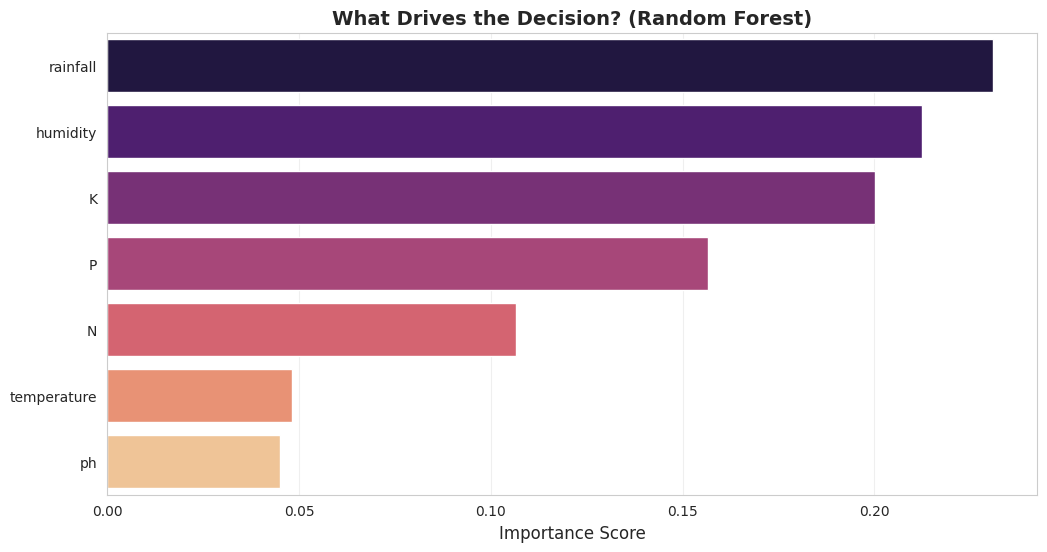

In [12]:
# Task 12: Visualization & Saving (The Showcase)
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Save the Goods
print("💾 SAVING SYSTEM")
print("-" * 20)
joblib.dump(final_model, 'best_crop_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("✅ Model Saved: 'best_crop_model.pkl'")
print("✅ Encoder Saved: 'label_encoder.pkl'")
print("-" * 20)

# 2. Visualize Feature Importance
print("\n📊 GENERATING REPORT...")

# Get importance (works for all model types)
if hasattr(final_model, 'feature_importances_'):
    importances = final_model.feature_importances_
else:
    importances = np.mean(np.abs(final_model.coef_), axis=0)

# Make a pretty dataframe
feature_df = pd.DataFrame({
    'Nutrient/Factor': X.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot with 'magma' palette (looks very sci-fi)
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Importance', 
    y='Nutrient/Factor', 
    data=feature_df, 
    palette='magma', 
    hue='Nutrient/Factor', 
    legend=False
)
plt.title(f'What Drives the Decision? ({best_model_name})', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)
plt.show()

In [14]:
# Task 13: Final "Real World" Test (Polished & Warning-Free)
import pandas as pd
import numpy as np

print("🚜 FARMER TEST MODE")
print("="*40)

# 1. Define the column names exactly as the model expects
cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# 2. Create the Test Cases as DataFrames (so the model sees the names)
# Case A: High Nitrogen, High Rain
input_1 = pd.DataFrame([[90, 42, 43, 20.8, 82.0, 6.5, 202.9]], columns=cols)

# Case B: Dry & Hot
input_2 = pd.DataFrame([[20, 40, 20, 25.0, 40.0, 7.0, 30.0]], columns=cols)

# 3. Predict
pred_1 = final_model.predict(input_1)
pred_2 = final_model.predict(input_2)

# 4. Decode (if needed)
if 'le' in locals():
    name_1 = le.inverse_transform(pred_1)[0]
    name_2 = le.inverse_transform(pred_2)[0]
else:
    name_1 = pred_1[0]
    name_2 = pred_2[0]

print(f"Test 1 (High Rain): Predicted -> 🌾 {name_1.upper()}")
print(f"Test 2 (Dry Land):  Predicted -> 🍂 {name_2.upper()}")
print("="*40)
print("✅ SYSTEM READY FOR DEPLOYMENT.")

🚜 FARMER TEST MODE
Test 1 (High Rain): Predicted -> 🌾 RICE
Test 2 (Dry Land):  Predicted -> 🍂 MUSKMELON
✅ SYSTEM READY FOR DEPLOYMENT.
